___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you will be given another dataset. Go ahead and follow the directions below.

## Import Libraries

**Import Pandas, Seaborn and the other usual libraries.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Get the Data

**Read the 'KNN_Project_Data csv file into a dataframe**

In [3]:
df = pd.read_csv('KNN_Project_Data.csv')

**Check the head of the dataframe.**

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [ ]:
# Consider this dataset as 'classified', i.e. you are not meant to know what the data represents

# EDA

Since the data is artificial, we'll do a large pairplot with Seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

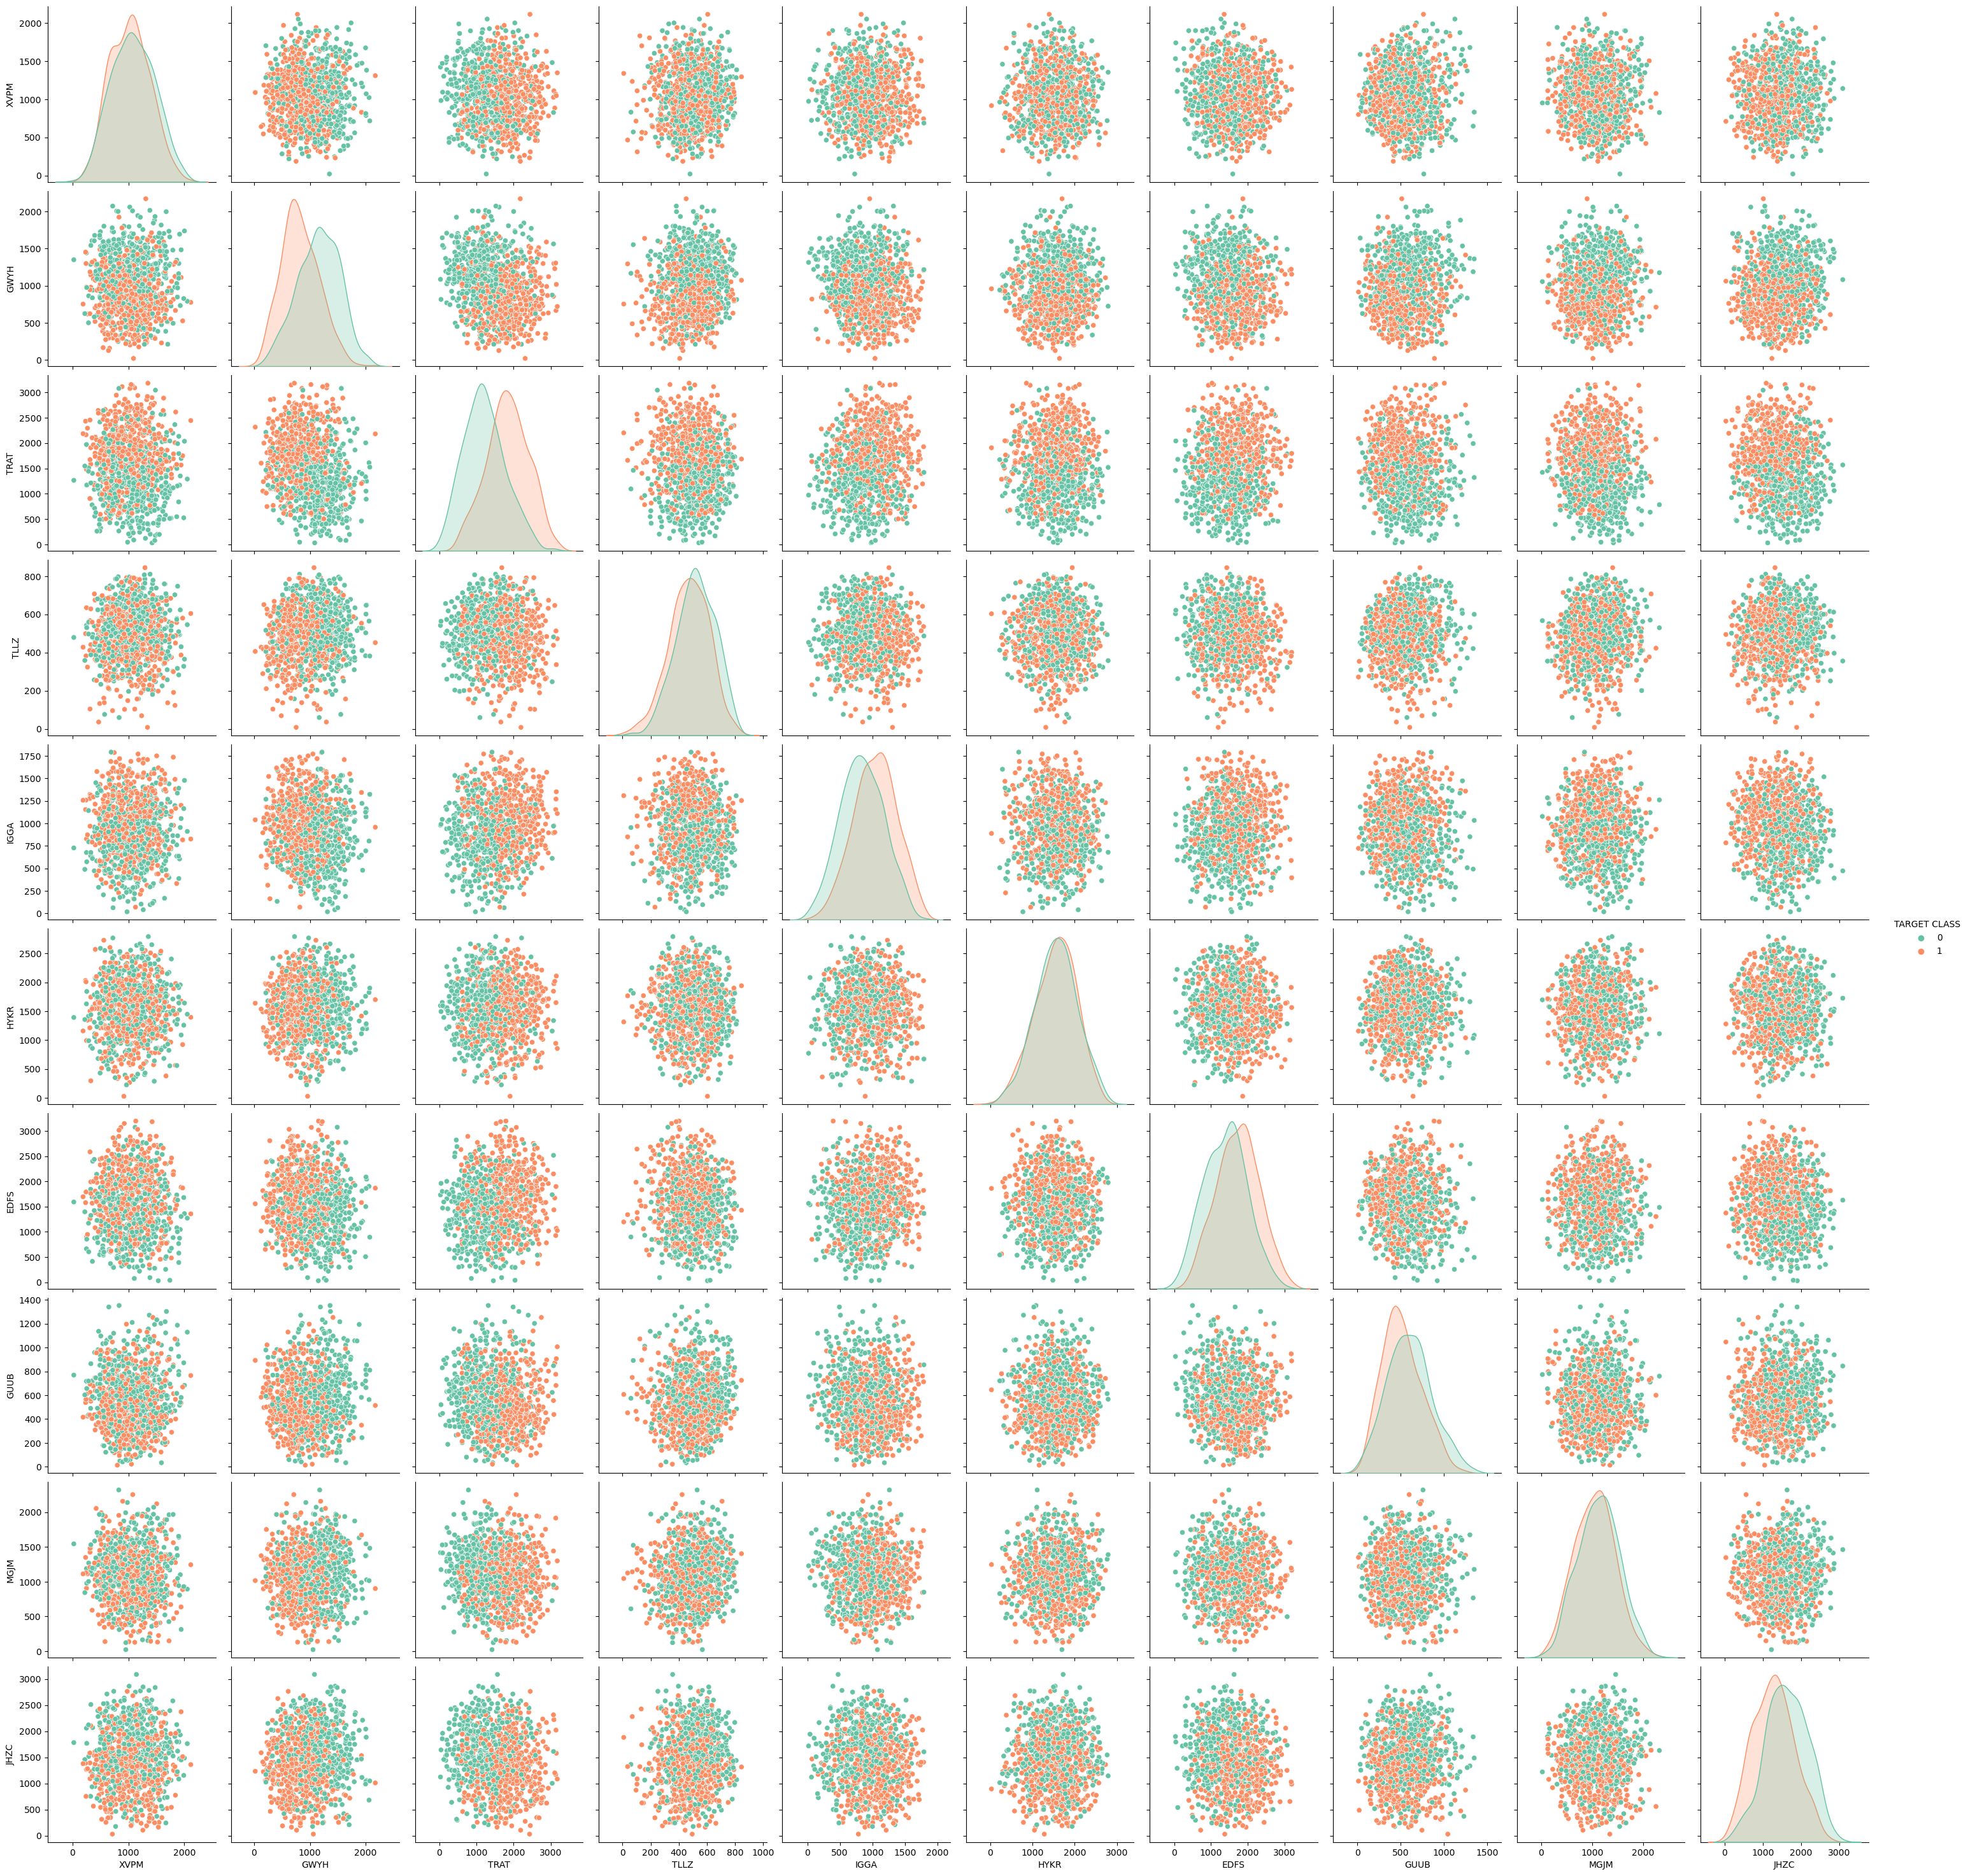

In [6]:
sns.pairplot(df, hue='TARGET CLASS', palette='Set2', height=3.0);

In [7]:
# Pretty good separation in TRAT column

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from SciKit Learn.**

In [8]:
from sklearn.preprocessing import StandardScaler

**Create a `StandardScaler()` object called scaler.**

In [9]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [11]:
X = df.drop('TARGET CLASS', axis=1)

y = df['TARGET CLASS']

In [12]:
scaler.fit(X)

StandardScaler()

**Use `.transform()` method to transform the features to a scaled version.**

In [13]:
Xss = scaler.transform(X)

In [14]:
Xss[:, :6]

array([[ 1.56852168, -0.44343461,  1.61980773, -0.9582548 , -1.12848137,
         0.13833575],
       [-0.11237594, -1.05657361,  1.7419175 , -1.50422015,  0.64000936,
         1.08155221],
       [ 0.66064691, -0.43698145,  0.77579285,  0.21339413, -0.0531708 ,
         2.03087225],
       ...,
       [-0.35889496, -0.97901454,  0.83771499,  0.01401811, -1.39742433,
         0.05447342],
       [ 0.27507999, -0.99239881,  0.0303711 ,  1.06295359,  1.14287086,
        -0.19287176],
       [ 0.62589594,  0.79510909,  1.12180047,  1.18594424,  0.55558183,
        -1.13303188]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [15]:
df_scaled = pd.DataFrame(Xss, columns=df.columns[:-1])

df_scaled.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [16]:
# Note how similar the values are after scaling

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Remember to split the scaled features
X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size=0.40)

# Using KNN

**Import KNeighborsClassifier from SciKit Learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with `n_neighbors=1`**

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

Let's evaluate our KNN model

**Use the predict method to predict values using your KNN model and X_test.**

In [22]:
y_pred = knn.predict(X_test)

**Create a confusion matrix and classification report.**

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test, y_pred))

[[140  56]
 [ 46 158]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       196
           1       0.74      0.77      0.76       204

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



In [ ]:
# Results are fairly good, but room for improvement!

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value.

**Create a for loop that trains various KNN models with different k-values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [31]:
from sklearn.metrics import accuracy_score

error_rate = []

for k in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(1 - (accuracy_score(y_test, pred)))

In [32]:
len(error_rate)

39

**Now create the following plot using the information from your for loop.**

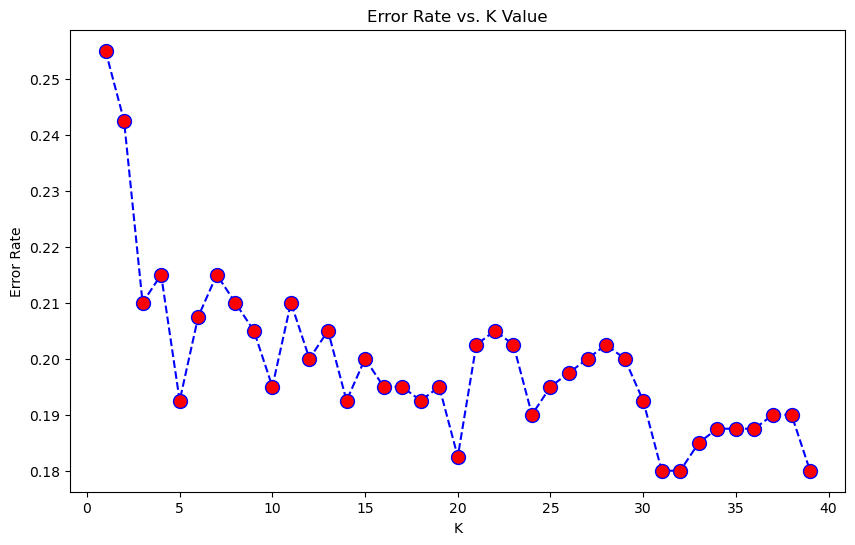

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [ ]:
# Dip in error at k=20, then error rate wavers until it hits its lowest at k=31 and k=32, and again at k=39
# Too high k-value can lead to overfitting, so re-train model with k=31

## Re-train with new K Value

**Re-train your model with the best K value (you decide) and redo the classification report and the confusion matrix.**

In [34]:
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

In [35]:
print(confusion_matrix(y_test, predictions))

[[149  47]
 [ 25 179]]


In [36]:
# Scores have improved by approx 8% which is quite good
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       196
           1       0.79      0.88      0.83       204

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [ ]:
# You can check the accuracy scores against increasing k-values, instead of the error rate

In [37]:
scores = []

# Increase range of k-values
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred == y_test)) / len(y_test)
    scores.append([k, score])

In [38]:
data = pd.DataFrame(scores, columns=['k', 'accuracy_score'])

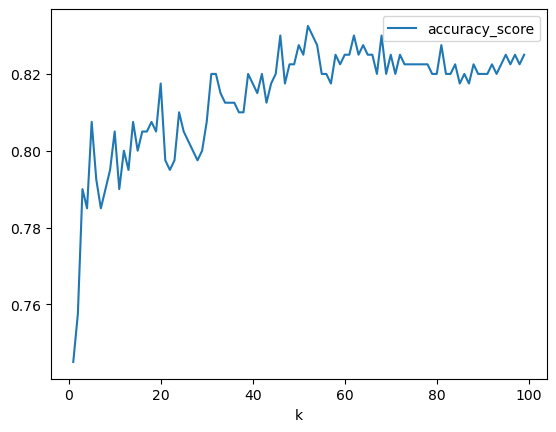

In [40]:
data.plot.line(x='k', y='accuracy_score');

In [41]:
# Interestingly, the highest accuracy score is recorded around k=52 which you can test further

knn = KNeighborsClassifier(n_neighbors=52)

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       196
           1       0.82      0.86      0.84       204

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
# There is a slight improvement - approx 1%

# Great Job!